Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

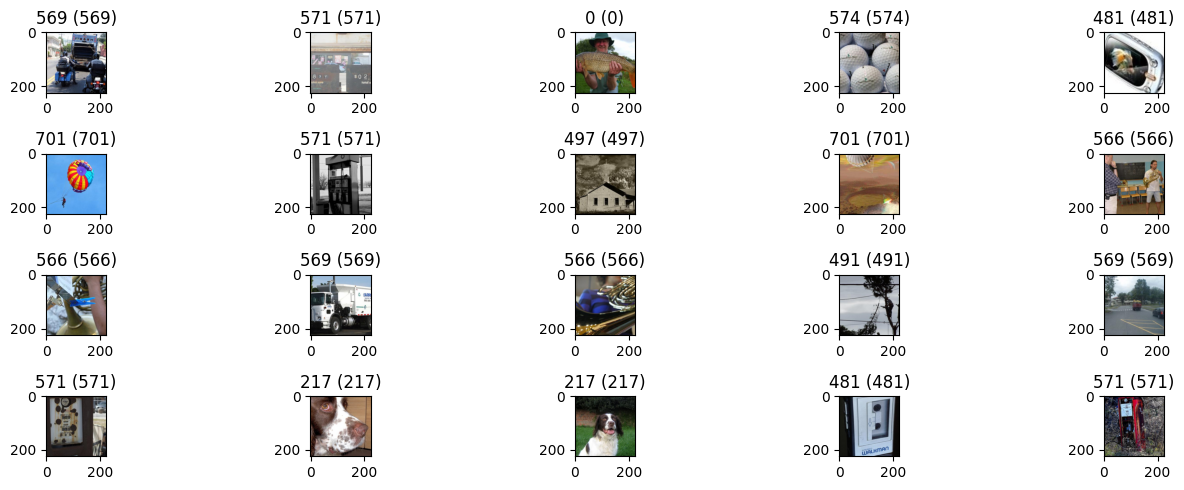

In [4]:
# %% [markdown]
# # Measure performance
# This notebook loads a file with precomputed measures (*qmeans*, *qbas* & *qinv*) for a set of rankings for a given instance of the dataset and measures the performance of the different alternative measures
# 
# ## 1. Load libraries, model and data

# %%

# Import the necessary libraries
import sys
import os
PROJ_DIR = os.path.realpath(os.path.dirname(os.path.dirname(os.path.abspath(''))))
sys.path.append(os.path.join(PROJ_DIR,'src'))
import xai_faithfulness_experiments_lib_edits as fl
import numpy as np
from typing import Optional
from matplotlib import pyplot as plt

DATASET = 'imagenet'
SAMPLE_INDICES = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]


if DATASET == 'cifar':
    with open(os.path.join(PROJ_DIR, 'assets', 'data', 'cifar-classnames.txt')) as fIn:
        class_names = fIn.readline().strip().split(' ')
    DATA_MEAN = [0.2675, 0.2565, 0.2761]
    DATA_STD = [0.5071, 0.4867, 0.4408]
elif DATASET == 'imagenet':
    DATA_MEAN = [0.485, 0.456, 0.406]
    DATA_STD = [0.229, 0.224, 0.225]
    class_names = [str(i) for i in range(1000)]
    #TODO Add imagenette class names

# Load dataset
#torch.manual_seed(0)
test_loader = fl.get_image_test_loader(DATASET, 100, PROJ_DIR, shuffle = True)

examples = enumerate(test_loader)
batch_idx, (x_train, y_train) = next(examples)



ig, axs = plt.subplots(4, 5, figsize=(14, 5))
for i, index in enumerate(SAMPLE_INDICES):
    image = x_train[index].detach().cpu().numpy()
    label = y_train[index].detach().cpu().numpy()
    axs[i//5, i%5].imshow(np.moveaxis(image, 0, -1) * DATA_STD + DATA_MEAN)
    axs[i//5, i%5].set_title(f'{class_names[label]} ({label})')
plt.tight_layout()
plt.show()
